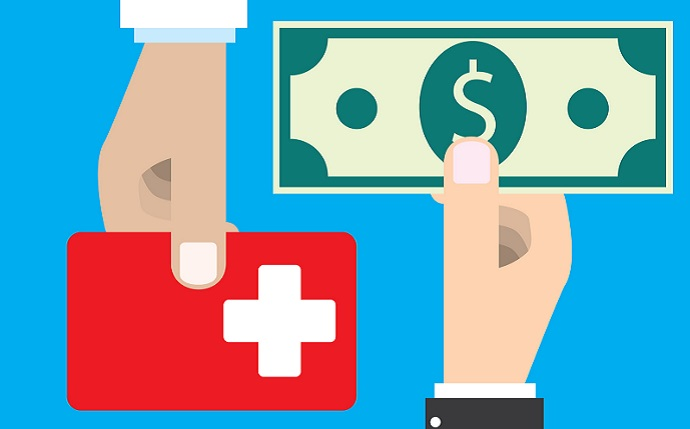

# Tratamento e Exploração de Dados

### Custos médicos

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dados = pd.read_csv('insurance.csv')
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
dados.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
for i in dados.select_dtypes(include='object').columns:
  print(dados[i].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [144]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

#### Transformação de dados categoricos em numéricos

In [9]:
encoder = LabelEncoder()

In [10]:
dados['sex'] = encoder.fit_transform(dados.sex)
dados['smoker'] = encoder.fit_transform(dados.smoker)

In [11]:
dados = dados.join(pd.get_dummies(dados.region))

In [12]:
dados.drop('region', axis=1, inplace=True)
dados.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


#### Criação de nova variável relacionada ao índice de massa corporal, onde 1 corresponde a um IMC saudável, e 0 corresponde a um IMC não saudável.

In [13]:
x = []
for n in dados['bmi']:
  if n > 18.5 or n < 24.9:
    x.append(1)
  if n < 18.5 or n > 24.9:
    x.append(0)

In [14]:
x = pd.DataFrame(x)
x = x.astype("float")

In [24]:
dados['bmi2'] = x

In [25]:
dados.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest,bmi2
0,19,0,27.900,0,1,16884.92400,0,0,0,1,1.0
1,18,1,33.770,1,0,1725.55230,0,0,1,0,0.0
2,28,1,33.000,3,0,4449.46200,0,0,1,0,1.0
3,33,1,22.705,0,0,21984.47061,0,1,0,0,0.0
4,32,1,28.880,0,0,3866.85520,0,1,0,0,1.0


In [26]:
dados['bmi2'] = dados.bmi2.astype('int')

Text(0.5, 1.0, 'Correlation map')

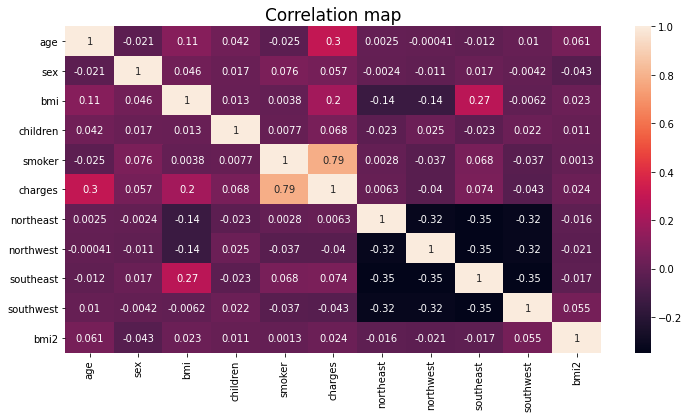

In [27]:
ax, fig = plt.subplots(figsize=(12,6))
sns.heatmap(dados.corr(), annot=True).set_title("Correlation map", size=17)

In [28]:
for n in dados.columns:
  print(n,":", dados['charges'].corr(dados[n]))

age : 0.2990081933306476
sex : 0.057292062202025484
bmi : 0.19834096883362895
children : 0.06799822684790478
smoker : 0.787251430498478
charges : 0.9999999999999999
northeast : 0.006348771280156089
northwest : -0.03990486404043805
southeast : 0.07398155156575979
southwest : -0.04321002899168478
bmi2 : 0.024437401770127702


In [29]:
columns = []
for n in dados.columns:
  if dados['charges'].corr(dados[n]) > 0.15:
    columns.append(n)

data = dados.loc[:,columns]

In [30]:
data.head()

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


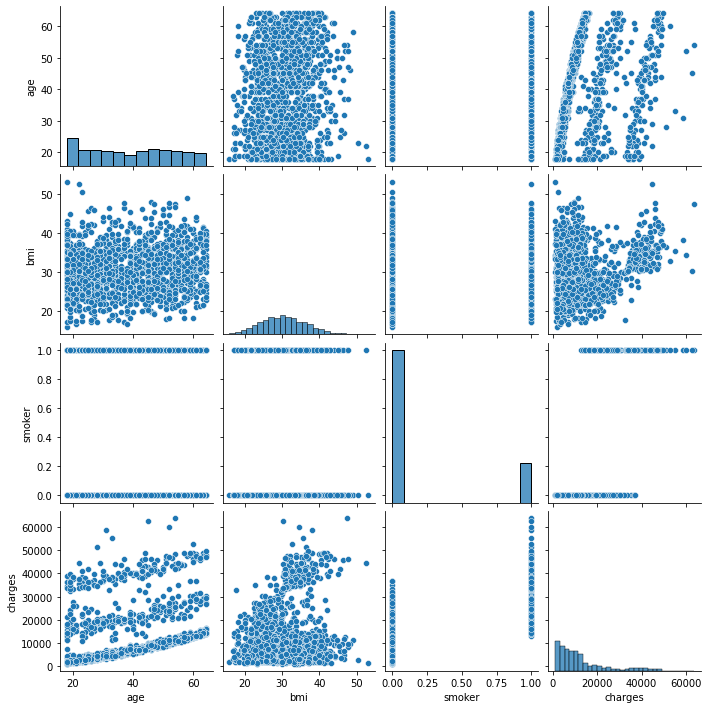

In [38]:
sns.pairplot(data)

### Aplicação de algoritmos de machine learning para prever o custo médico

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [110]:
x = data.iloc[:,0:3]
y = data.iloc[:,3]

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Árvores de decisão

In [112]:
modelo1 = DecisionTreeRegressor()
modelo1.fit(x_train, y_train)
predicao1 = modelo1.predict(x_test)

In [113]:
print("MAE :", mean_absolute_error(y_test, predicao1))
print("Média predição :", predicao1.mean())
print("Média val. reais :", y_test.mean())

MAE : 3341.4702648345774
Média predição : 12774.348793976369
Média val. reais : 12611.750531455229


### Random Forest

In [114]:
modelo2 = RandomForestRegressor()
modelo2.fit(x_train, y_train)
predicao2 = modelo2.predict(x_test)

In [115]:
print("MAE :", mean_absolute_error(y_test, predicao2))
print("Média predição :", predicao2.mean())
print("Média val. reais :", y_test.mean())

MAE : 2854.9003277739166
Média predição : 12635.486497577624
Média val. reais : 12611.750531455229


### KMeans - clustering

In [145]:
scaler = StandardScaler()

In [147]:
data_scaler = scaler.fit_transform(data)

#### Elbow Method

In [148]:
K = range(1,16)
valores = []
for k in K:
  kmean = KMeans(n_clusters=k)
  kmean.fit(data_scaler)
  valores.append(kmean.inertia_)

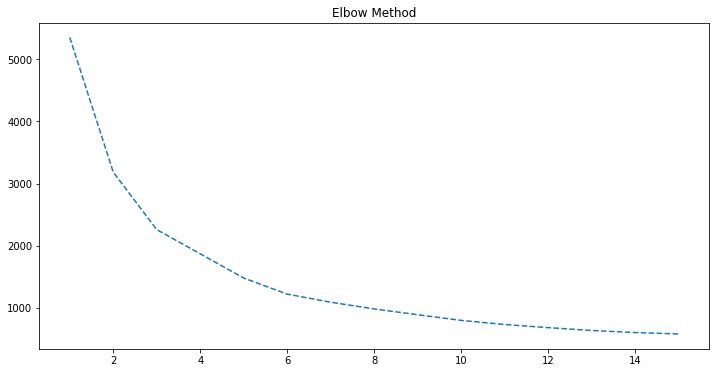

In [149]:
plt.subplots(figsize=(12,6))
plt.plot(K, valores, '--')
plt.title("Elbow Method")
plt.show()

In [151]:
clustering = KMeans(n_clusters=3)
clustering.fit(data_scaler)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [152]:
predicao3 = clustering.labels_
centroides = clustering.cluster_centers_

#### Aplicação do PCA para facilitar a vizualização dos dados

In [192]:
centroides

array([[-0.04930162,  0.00739054,  1.97058663,  1.55134715],
       [-0.82858053, -0.21804735, -0.5074631 , -0.6765311 ],
       [ 0.89280087,  0.22421683, -0.5074631 , -0.10968499]])

In [194]:
pca = PCA(n_components=2)
dados_pca = pca.fit_transform(data_scaler)
dados_pca = pd.DataFrame(dados_pca, columns=['pca1', 'pca2'])
dados_pca = pd.concat([dados_pca, pd.DataFrame({'grupos' : predicao3, "charge" : data.charges})], axis = 1)

In [195]:
dados_pca.head()

,pca1,pca2,grupos,charge
0,1.012101,2.061351,0,16884.92400
1,-1.271650,0.439141,1,1725.55230
2,-0.959939,0.054069,1,4449.46200
3,-0.179088,0.922663,1,21984.47061
4,-1.054932,0.284976,1,3866.85520


In [199]:
from matplotlib.patches import Ellipse

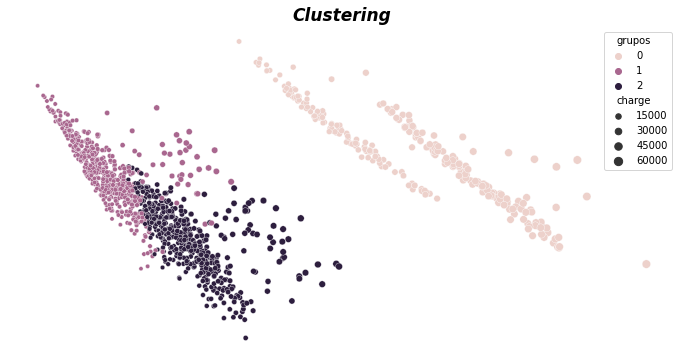

In [217]:
ax, fig = plt.subplots(figsize=(12,6))
sns.scatterplot(x=dados_pca.pca1, y=dados_pca.pca2, hue=dados_pca.grupos, size=dados_pca.charge)
plt.title("Clustering", size=17, style='oblique', fontweight='bold')
##remove spines
fig.spines["right"].set_visible(False)
fig.spines['top'].set_visible(False)
fig.spines['left'].set_visible(False)
fig.spines['bottom'].set_visible(False)
##remove labels
fig.axis(False)
plt.show()

### Modelo de regressão

In [218]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [219]:
x_reg = sm.add_constant(x, prepend=False)

In [220]:
modelo4 = sm.OLS(endog=y, exog=x_reg)
res = modelo4.fit()

In [221]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:02:22   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          259.5475     11.934     21.748      0.0

In [223]:
x_reg_test = sm.add_constant(x_test, prepend=False)

In [225]:
predicao4 = res.predict(x_reg_test)

In [226]:
print("MAE :", mean_absolute_error(y_test, predicao4))
print("Média predição :", predicao4.mean())
print("Média val. reais :", y_test.mean())

MAE : 3976.7224903078463
Média predição : 12908.21548395884
Média val. reais : 12611.750531455229
